<a href="https://colab.research.google.com/github/mfilipak/ACBR-2023/blob/main/DIA6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Dados Históricos - Ibovespa.csv")

In [12]:
df.columns

Index(['Data', 'Último', 'Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%'], dtype='object')

In [45]:
raw = np.array(df[['Último', 'Abertura', 'Máxima', 'Mínima', 'Vol.']])
raw[...,4] = [eval(".".join(_[:-1].split(","))) for _ in raw[...,4]]
raw = raw.astype("float")

In [46]:
raw.shape

(269, 5)

In [56]:
x = raw[:100]
y = raw[100][[2,3]]

In [63]:
X = []
Y = []
for i in range(100,len(raw)):
  X += [raw[i-100:i]]
  Y += [raw[i][[2,3]]]
X = np.array(X)
Y = np.array(Y)

In [64]:
X.shape, Y.shape

((169, 100, 5), (169, 2))

In [99]:
X_train = X[:167]
Y_train = Y[:167]
X_test = X[167:]
Y_test = Y[167:]
X_train.shape, X_test.shape

((167, 100, 5), (2, 100, 5))

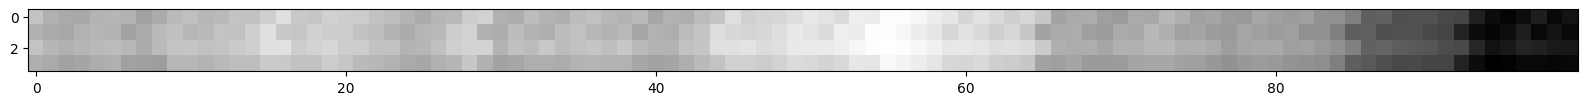

[113.68  112.164]


In [100]:
plt.figure(figsize=(20,20))
plt.imshow(X[1][...,:4].T, cmap="gray")
plt.show()
print(Y[1])

In [101]:
X.shape

(169, 100, 5)

In [107]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the input shape
input_shape = (100, 5)  # Each sample has 100 timesteps with 5 features

# Create the model
model = models.Sequential()

# Add a convolutional layer
# Assuming you want 1D convolution since the input is a time series
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape))

# Flatten the output of the convolutional layer before passing it to the dense layers
model.add(layers.Flatten())

# Add the first dense layer
model.add(layers.Dense(64, activation='relu'))

# Add the second dense layer
model.add(layers.Dense(32, activation='relu'))

# Add the output layer
model.add(layers.Dense(2))  # For regression output, no activation is used in the output layer

# Compile the model
model.compile(optimizer='adam', loss='mse')  # 'mse' is a common loss function for regression

# Display the model's architecture
model.summary()

ValueError: Input 0 of layer "conv2d" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 100, 5)

In [89]:
model.predict(X_test), Y_test

1/1 [==============================] - 0s 71ms/step


(array([[21.52691  ,  2.4700222],
        [21.435991 ,  1.0585175],
        [21.883583 ,  1.9982605],
        [21.996151 ,  2.5633068],
        [21.16227  ,  2.2626839],
        [21.213905 ,  2.314907 ],
        [21.439342 ,  1.0446224],
        [21.70021  ,  0.377573 ],
        [21.368334 ,  0.6969204]], dtype=float32),
 array([[105.171, 103.17 ],
        [104.44 , 103.323],
        [104.912, 103.321],
        [105.497, 103.105],
        [106.794, 104.932],
        [106.402, 105.227],
        [107.611, 105.36 ],
        [108.663, 106.731],
        [109.174, 106.72 ]]))

In [103]:
model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
6/6 [==============================] - 0s 15ms/step - loss: 18.9700
Epoch 2/100
6/6 [==============================] - 0s 14ms/step - loss: 16.7647
Epoch 3/100
6/6 [==============================] - 0s 15ms/step - loss: 6.8672
Epoch 4/100
6/6 [==============================] - 0s 14ms/step - loss: 6.1928
Epoch 5/100
6/6 [==============================] - 0s 15ms/step - loss: 13.2740
Epoch 6/100
6/6 [==============================] - 0s 14ms/step - loss: 6.6138
Epoch 7/100
6/6 [==============================] - 0s 15ms/step - loss: 2.3762
Epoch 8/100
6/6 [==============================] - 0s 15ms/step - loss: 2.4509
Epoch 9/100
6/6 [==============================] - 0s 16ms/step - loss: 2.9691
Epoch 10/100
6/6 [==============================] - 0s 14ms/step - loss: 3.4105
Epoch 11/100
6/6 [==============================] - 0s 15ms/step - loss: 3.8836
Epoch 12/100
6/6 [==============================] - 0s 15ms/step - loss: 3.2796
Epoch 13/100
6/6 [============================

In [106]:
Y_train[-1]

array([107.611, 105.36 ])

In [104]:
model.predict(X_test)

1/1 [==============================] - 0s 22ms/step


array([[104.3409  , 101.133385],
       [103.703735, 100.40862 ]], dtype=float32)

In [105]:
Y_test

array([[108.663, 106.731],
       [109.174, 106.72 ]])

In [98]:
X_test.shape

(9, 100, 5)

In [136]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the input shape for 2D convolution, assuming 1 channel (e.g., grayscale image)
input_shape = (100, 5, 1)  # Height = 100, Width = 5, Channels = 1

# Create the model
model = models.Sequential()

# Add the first 2D convolutional layer with 3x3 filters
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

# Add the second 2D convolutional layer with 3x3 filters
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))

#model.add(layers.GlobalAveragePooling2D())
# Flatten the output of the convolutional layers before passing it to the dense layers
model.add(layers.Flatten())

# Add the first dense layer
model.add(layers.Dense(64, activation='relu'))

# Add the second dense layer
model.add(layers.Dense(32, activation='relu'))

# Add the output layer
model.add(layers.Dense(2))  # For regression output, no activation is used in the output layer

# Compile the model
model.compile(optimizer='adam', loss='mse')  # 'mse' is a common loss function for regression

# Display the model's architecture
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 98, 3, 128)        1280      
                                                                 
 conv2d_10 (Conv2D)          (None, 96, 1, 256)        295168    
                                                                 
 flatten_5 (Flatten)         (None, 24576)             0         
                                                                 
 dense_15 (Dense)            (None, 64)                1572928   
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 2)                 66        
                                                                 
Total params: 1871522 (7.14 MB)
Trainable params: 1871

In [137]:
model.input_shape, model.output_shape

((None, 100, 5, 1), (None, 2))

In [138]:
model.predict(X_test[...,None])

1/1 [==============================] - 0s 101ms/step


array([[2.0186162, 0.5334127],
       [2.059155 , 0.5090163]], dtype=float32)

In [116]:
X_test[...,None].shape

(2, 100, 5, 1)

In [139]:
model.fit(X_train[...,None], Y_train, epochs=100)

Epoch 1/100
6/6 [==============================] - 2s 147ms/step - loss: 3738.0476
Epoch 2/100
6/6 [==============================] - 1s 122ms/step - loss: 701.7387
Epoch 3/100
6/6 [==============================] - 1s 126ms/step - loss: 134.8232
Epoch 4/100
6/6 [==============================] - 1s 126ms/step - loss: 58.3710
Epoch 5/100
6/6 [==============================] - 1s 131ms/step - loss: 31.5683
Epoch 6/100
6/6 [==============================] - 1s 126ms/step - loss: 39.4351
Epoch 7/100
6/6 [==============================] - 1s 126ms/step - loss: 31.9410
Epoch 8/100
6/6 [==============================] - 1s 127ms/step - loss: 25.9859
Epoch 9/100
6/6 [==============================] - 1s 126ms/step - loss: 26.3623
Epoch 10/100
6/6 [==============================] - 1s 122ms/step - loss: 25.2204
Epoch 11/100
6/6 [==============================] - 1s 129ms/step - loss: 34.5624
Epoch 12/100
6/6 [==============================] - 1s 201ms/step - loss: 28.2023
Epoch 13/100
6/6 [===

In [141]:
Y_train[-1], model.predict(X_test[...,None])

1/1 [==============================] - 0s 87ms/step


(array([107.611, 105.36 ]),
 array([[103.28148 , 101.40098 ],
        [103.455444, 101.58518 ]], dtype=float32))

In [128]:
Y_test

array([[108.663, 106.731],
       [109.174, 106.72 ]])

In [143]:
from sklearn.ensemble import RandomForestRegressor

# Configurar os parâmetros do modelo
# n_estimators é o número de árvores na floresta
# random_state é a semente para a geração de números aleatórios
n_estimators = 10  # Pode ajustar este número conforme necessário
random_state = 42

# Criar o modelo de Random Forest para regressão
modelrf = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)


In [153]:
modelrf.fit(X_train.ravel().reshape(167,500), Y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [154]:
modelrf.predict(X_test.ravel().reshape(2,500))

array([[108.4144, 106.5355],
       [108.2402, 106.4272]])

In [148]:
X_train.shape

(167, 100, 5)

In [155]:
from sklearn.ensemble import RandomForestRegressor

# Configurar os parâmetros do modelo
# n_estimators é o número de árvores na floresta
# random_state é a semente para a geração de números aleatórios
n_estimators = 10  # Pode ajustar este número conforme necessário
random_state = 42

# Criar o modelo de Random Forest para regressão
modelrf = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)

In [166]:
modelrf.fit(X_train[:100].ravel().reshape(100,500), Y_train[:100])

RandomForestRegressor(n_estimators=10, random_state=42)

In [167]:
modelrf.predict(X_test.ravel().reshape(2,500))

array([[114.0017, 111.9141],
       [114.0627, 112.0738]])